<div style="text-align:center; color:#A4161A; font-size:24px; font-weight:bold;">Credit Card Fraud: Data Analysis and Prediction using ANN</div><br>

<div style="text-align: center;"><img src="img/credit-card-fraud.png" alt="Image Description" width="400"/></div>

# Content

1. [Introduction](#introduction)
   - [The Problem](#the-problem)
   - [The Goal](#the-goal)
   - [Objectives](#objectives)
2. [Import Libraries and Data](#import-libraries-and-data)
3. [EDA (Exploratory Data Analysis)](#eda-exploratory-data-analysis)
   - [Data exploration](#data-exploration)
   - [Data visualization](#data-visualization)
4. [Feature Engineering](#feature-engineering)
   - [Feature scaling](#feature-scaling)
   - [Data resampling](#data-resampling)
5. [Model Selection](#model-selection)
6. [Model Evaluation](#model-evaluation)
7. [Conclusion](#conclusion)
   - [Data insights](#data-insights)
   - [Model choice](#model-choice)
   - [What's next](#whats-next)

# 1. Introduction <a id="introduction"></a>
### The problem <a id="the-problem"></a>
The problem of credit card fraud presents significant challenges for financial institutions, businesses, and consumers worldwide. It leads to financial losses for both individuals and businesses, erodes trust in financial systems, and can result in personal identity theft and compromised financial security.
### The goal <a id="the-goal"></a>
The goal of this project is to develop an Artificial Neural Network (ANN) model capable of predicting credit card fraud. The ultimate objective is to create an accurate and reliable system that can identify potentially fraudulent transactions, thereby assisting financial institutions and businesses in preventing or mitigating losses caused by fraudulent activities.
### Objectives <a id="objectives"></a>
- Explore and understand the data
- Preprocess the data
- Build an Artificial Neural Network (ANN)
- Evaluate model performance

# 2. Import libraries and data <a id="import-libraries-and-data">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split

import scipy.stats as stat
import pylab 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [2]:
filepath = 'data/creditcard.csv'
df = pd.read_csv(filepath)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 3. EDA (Exploratory Data Analysis) <a id="eda-exploratory-data-analysis">

### Data exploration <a id="data-exploration">

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


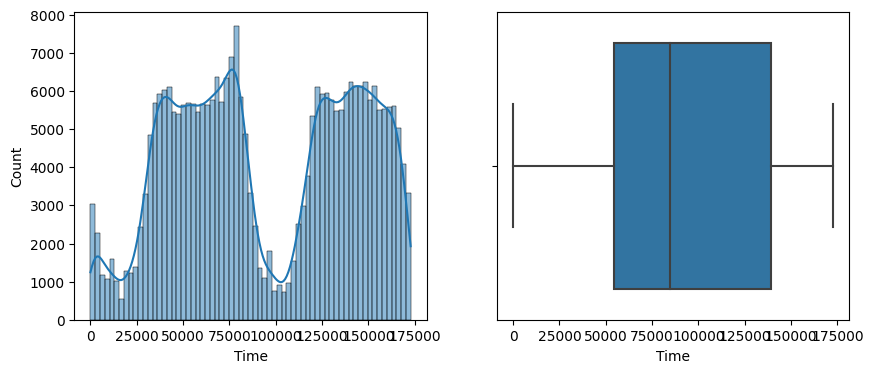

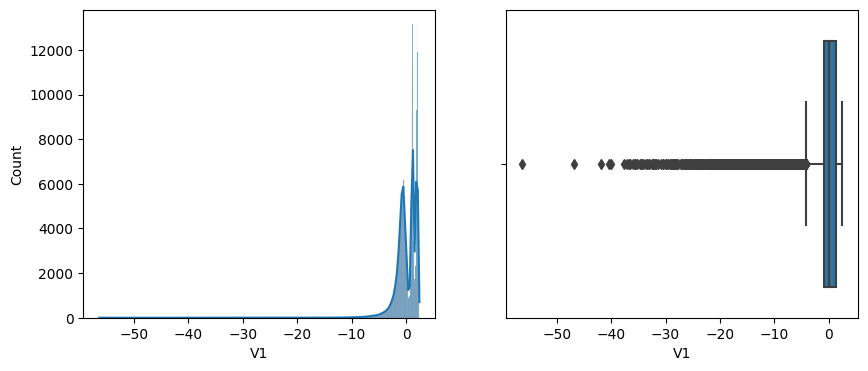

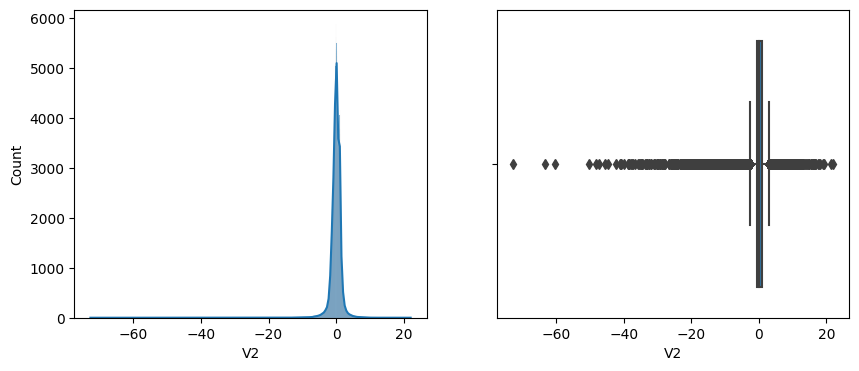

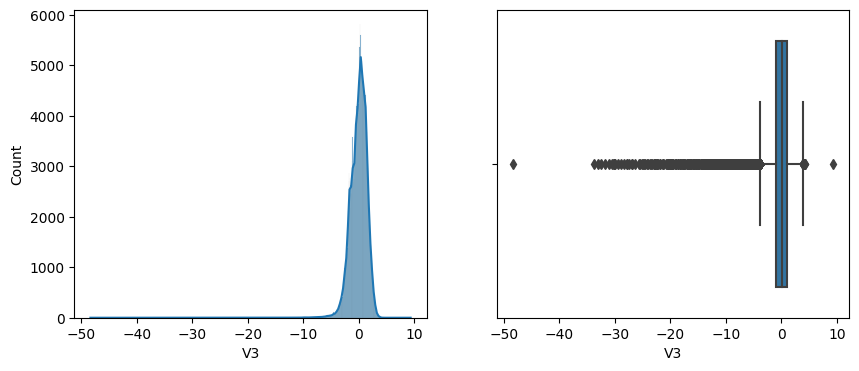

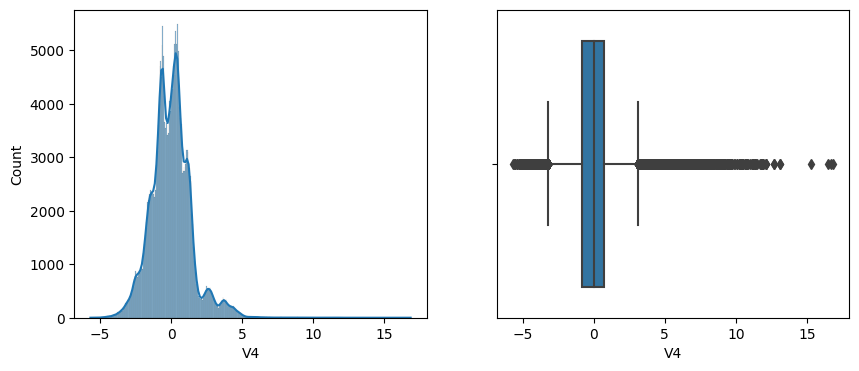

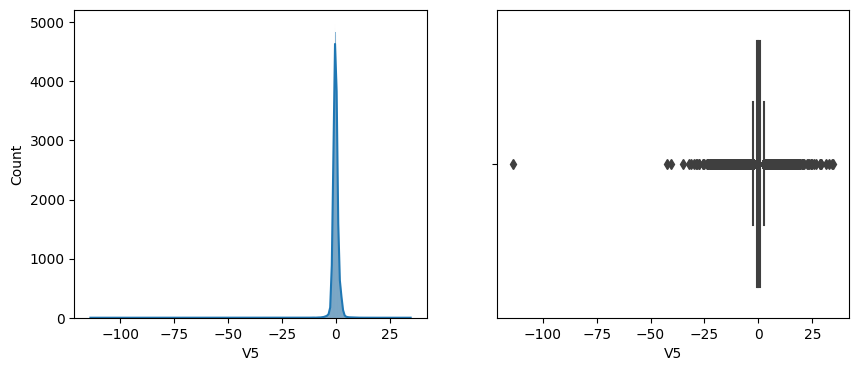

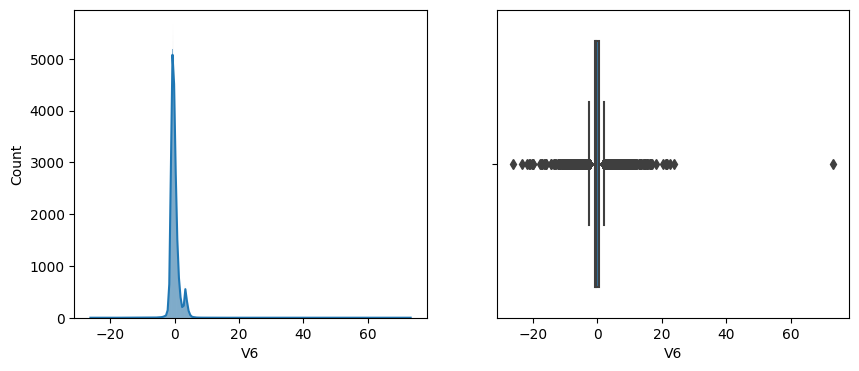

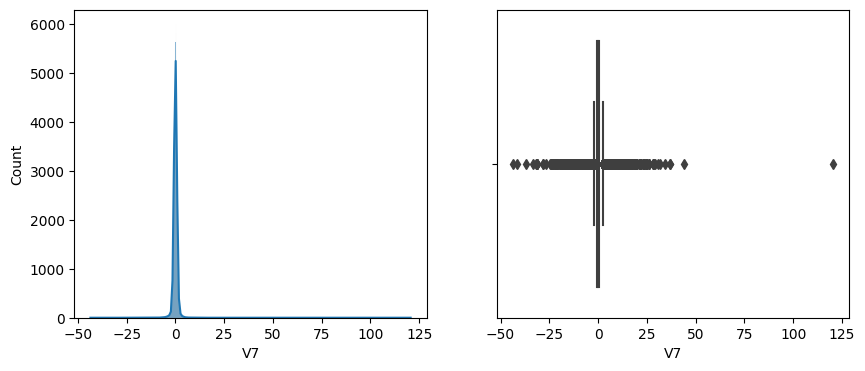

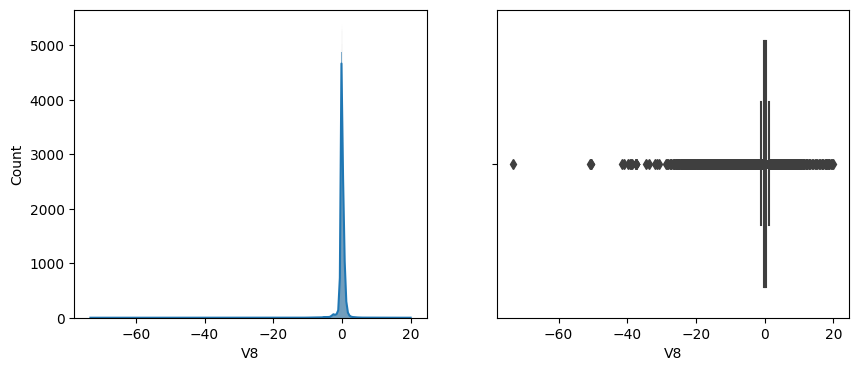

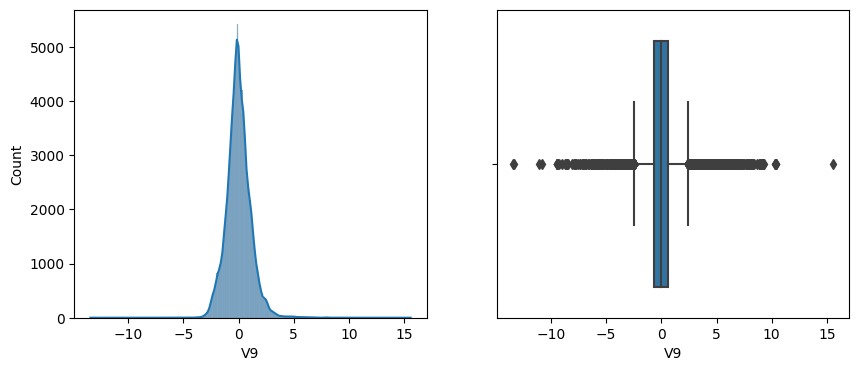

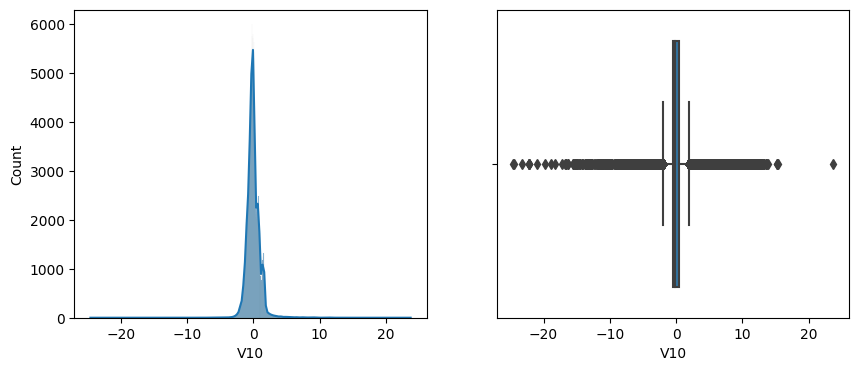

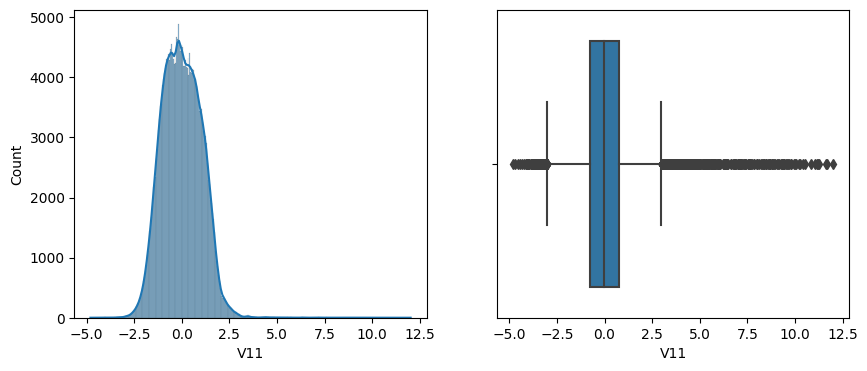

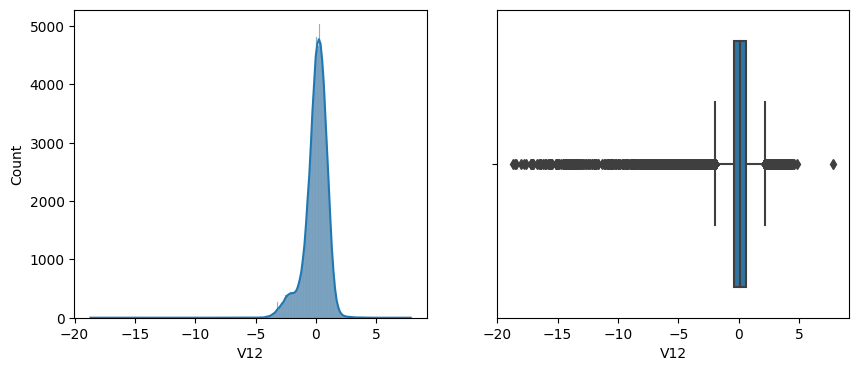

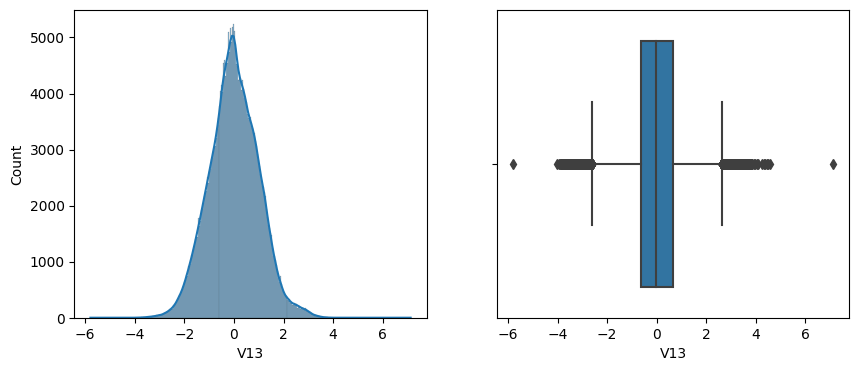

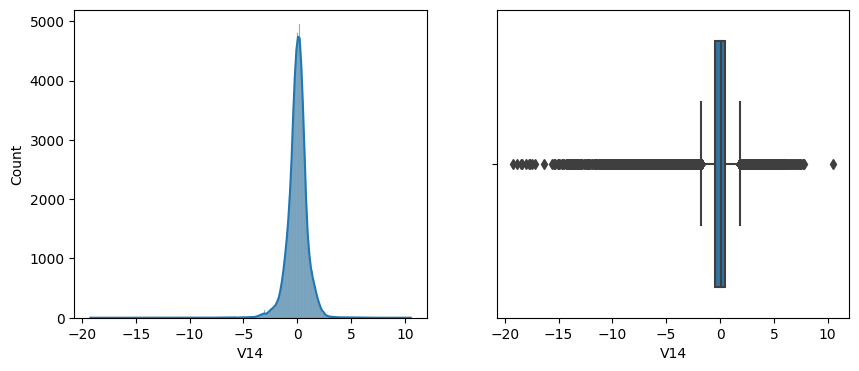

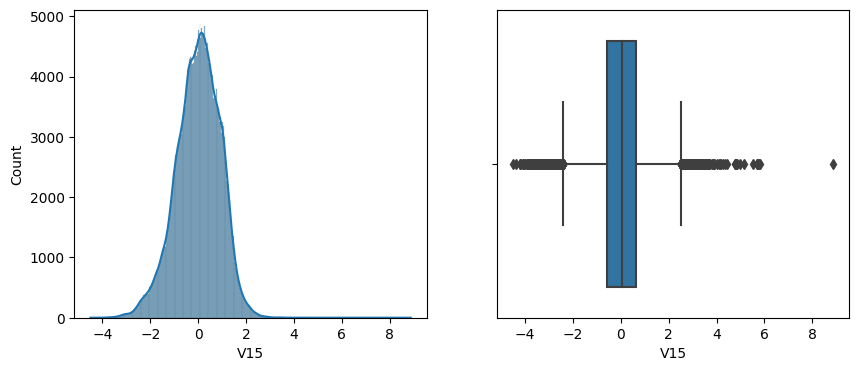

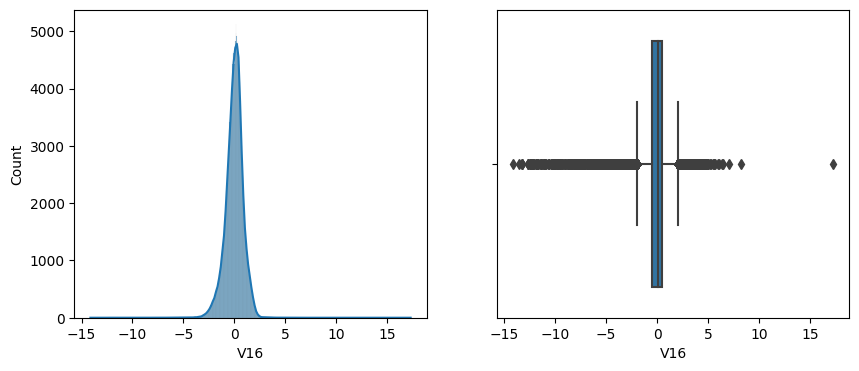

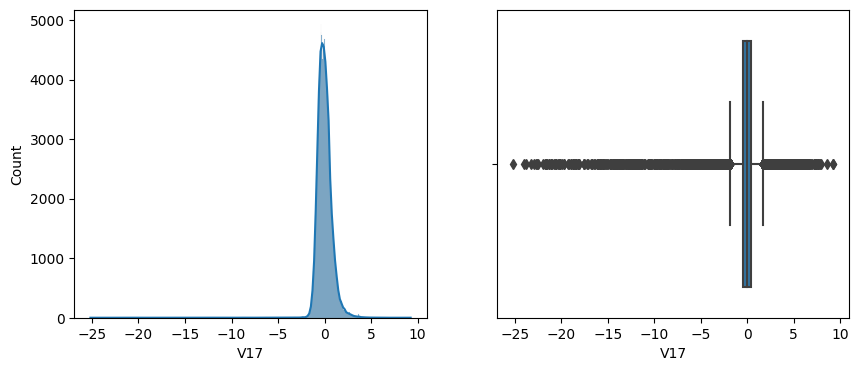

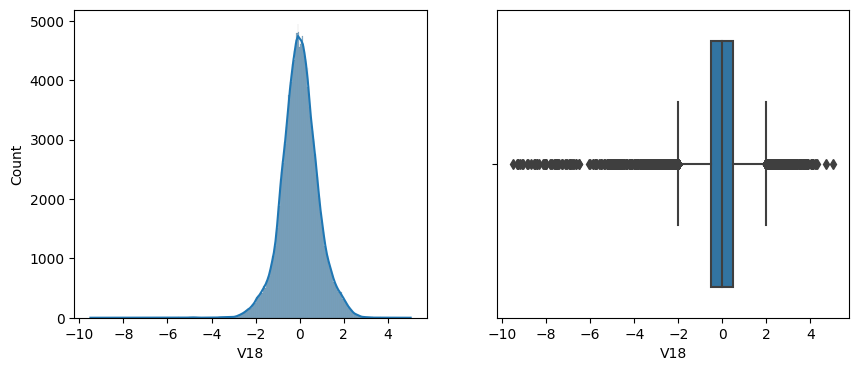

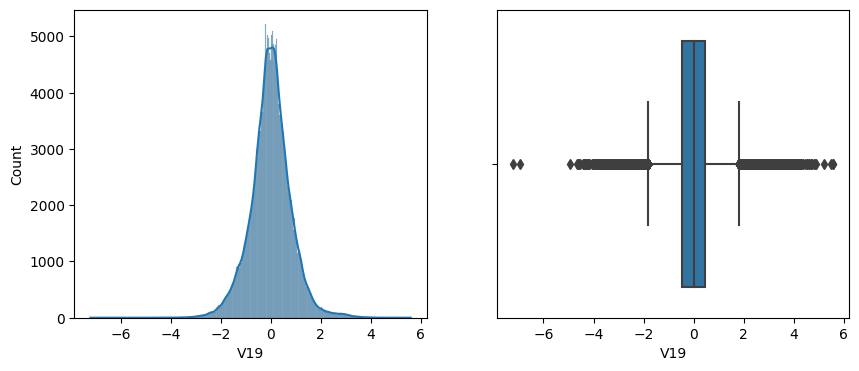

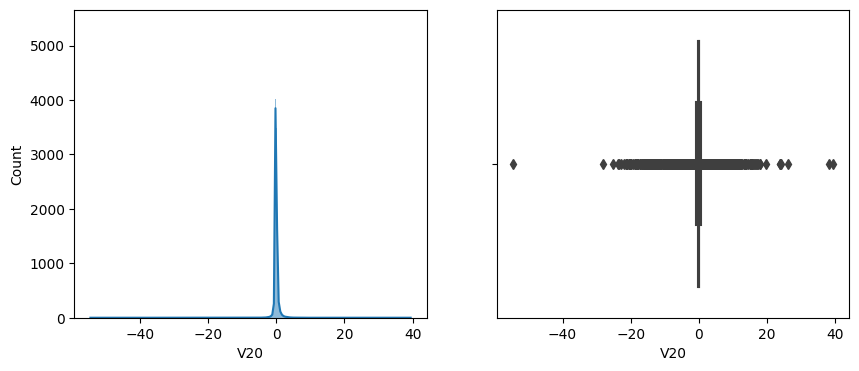

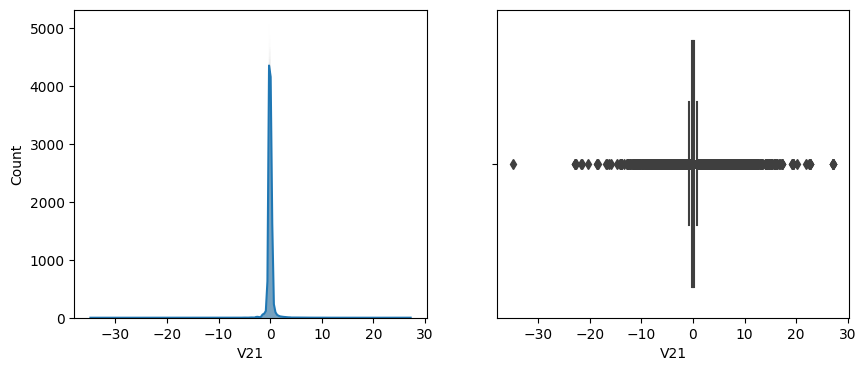

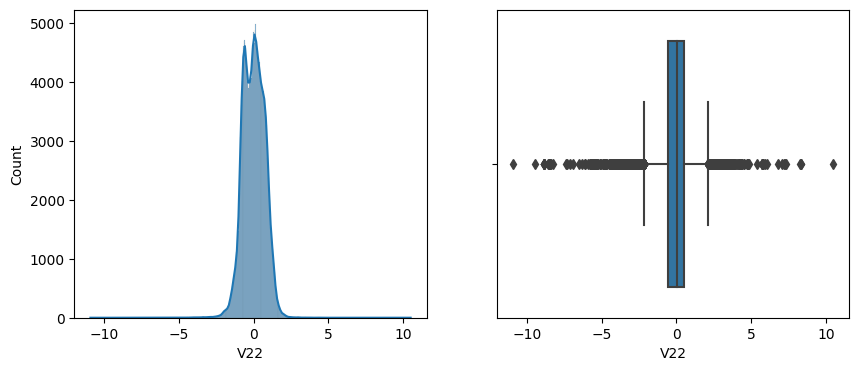

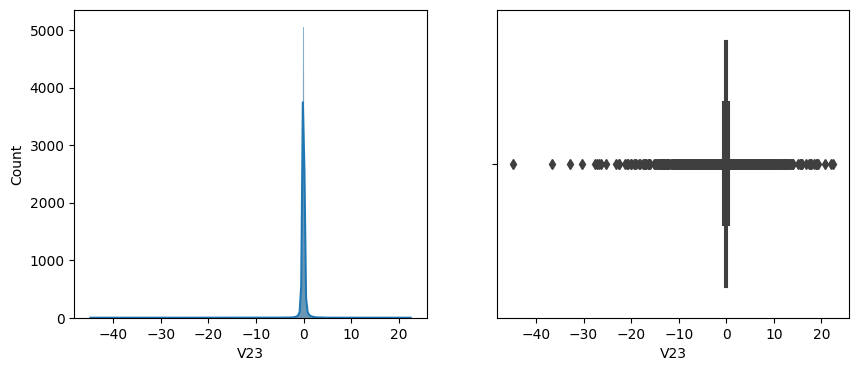

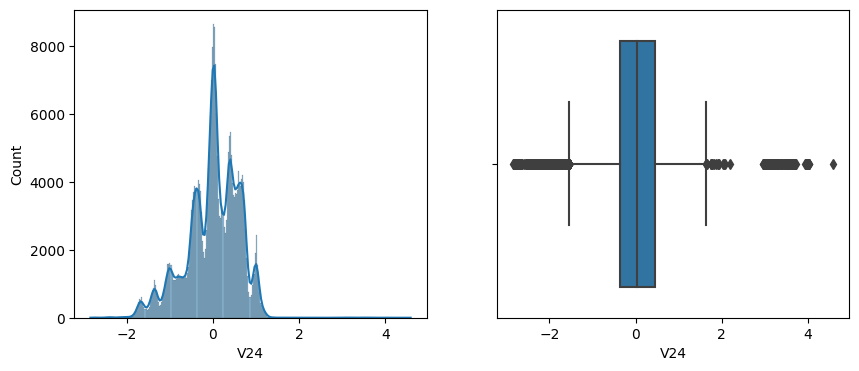

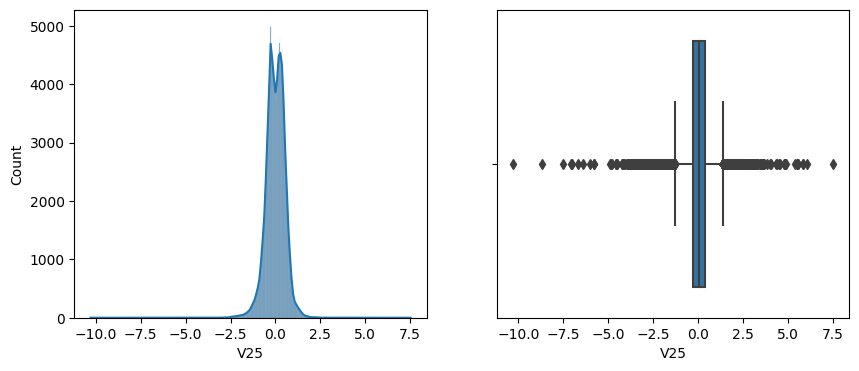

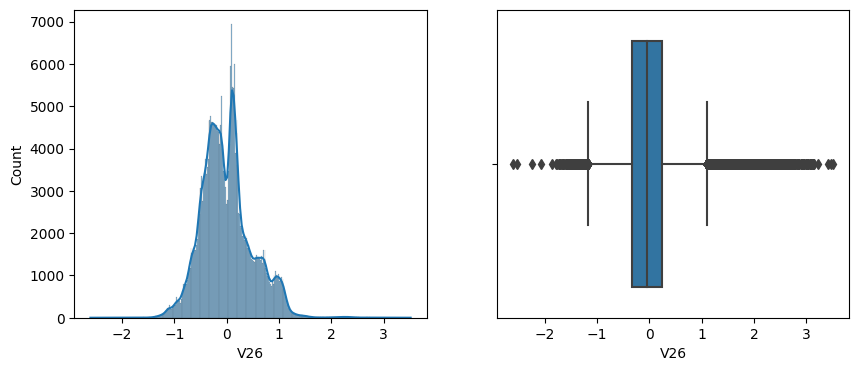

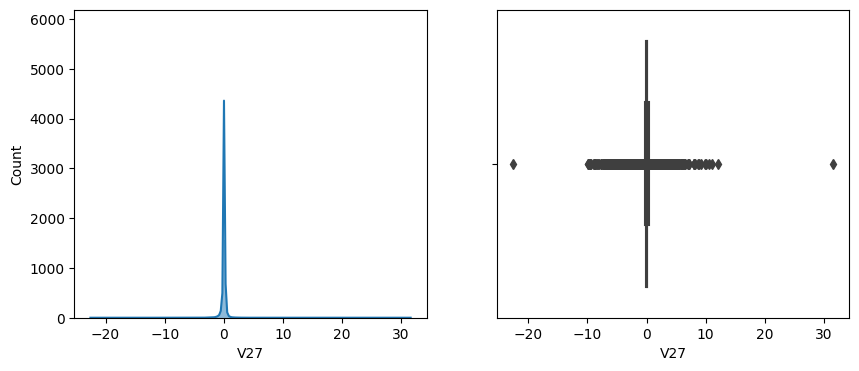

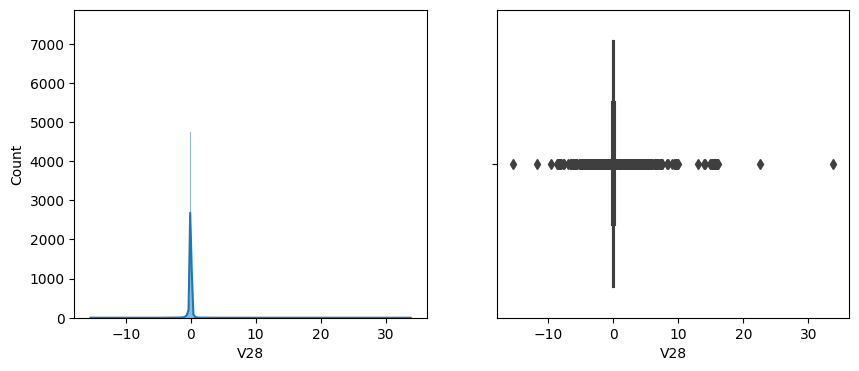

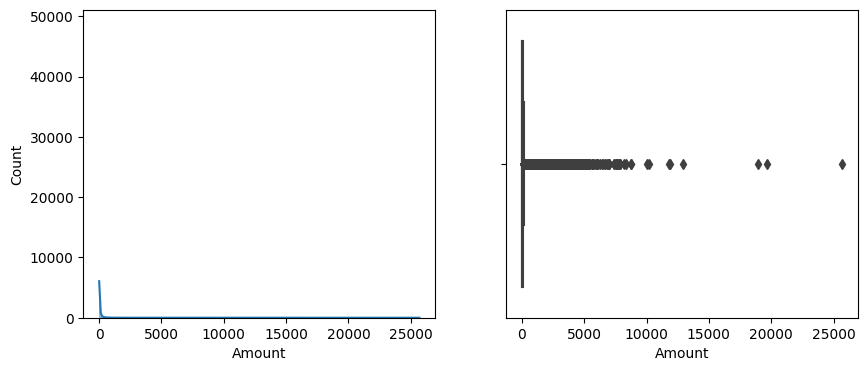

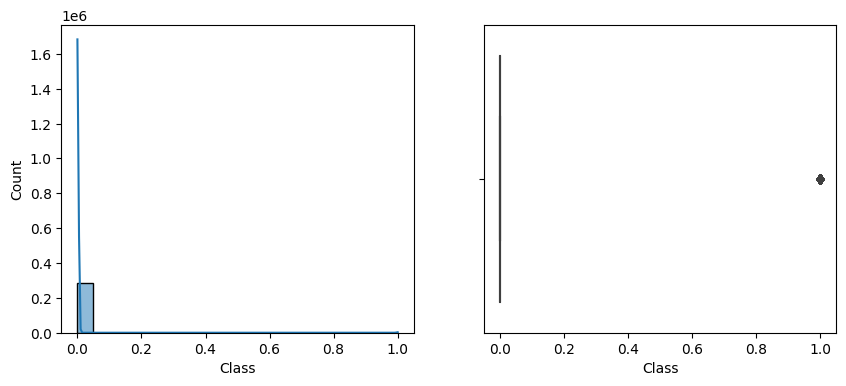

In [6]:
for feature in df.columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    ax0 = axes[0]
    sns.histplot(data=df, x=feature, kde=True, ax=ax0)

    ax1 = axes[1]
    sns.boxplot(data=df, x=feature, ax=ax1)

    plt.show()

Most features contain many outliers.

In [7]:
def count_outliers(feature):
    data = df[feature]
    # Calculate Q1, Q3, and IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    # Define lower and upper cutoff for outliers
    lower_cutoff = Q1 - 1.5 * IQR
    upper_cutoff = Q3 + 1.5 * IQR
    # Identify outliers
    outliers = [value for value in data if value < lower_cutoff or value > upper_cutoff]
    
    return len(outliers)

In [8]:
for feature in df.columns:
    outliers=count_outliers(feature)
    print(f'{feature} outliers detected: {outliers}')

Time outliers detected: 0
V1 outliers detected: 7062
V2 outliers detected: 13526
V3 outliers detected: 3363
V4 outliers detected: 11148
V5 outliers detected: 12295
V6 outliers detected: 22965
V7 outliers detected: 8948
V8 outliers detected: 24134
V9 outliers detected: 8283
V10 outliers detected: 9496
V11 outliers detected: 780
V12 outliers detected: 15348
V13 outliers detected: 3368
V14 outliers detected: 14149
V15 outliers detected: 2894
V16 outliers detected: 8184
V17 outliers detected: 7420
V18 outliers detected: 7533
V19 outliers detected: 10205
V20 outliers detected: 27770
V21 outliers detected: 14497
V22 outliers detected: 1317
V23 outliers detected: 18541
V24 outliers detected: 4774
V25 outliers detected: 5367
V26 outliers detected: 5596
V27 outliers detected: 39163
V28 outliers detected: 30342
Amount outliers detected: 31904
Class outliers detected: 492


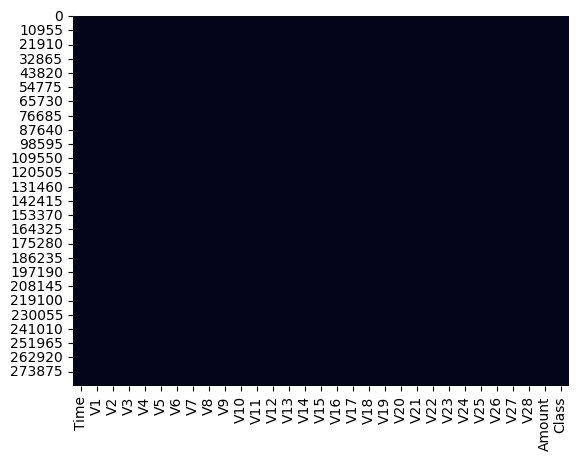

In [9]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()
for feature in df.columns:
    percentage_missing = df[feature].isnull().sum()/df.shape[0]*100
    if percentage_missing > 0:
        percentage_formatted = "{:.3f}".format(percentage_missing)
        print (f'{feature}: {percentage_formatted}%')

In [10]:
df.duplicated().sum()

1081

In [11]:
df.drop_duplicates(inplace=True)

### Data visualization <a id="data-visualization">

In [12]:
color_blue = sns.color_palette()[0]
color_red = sns.color_palette()[3]

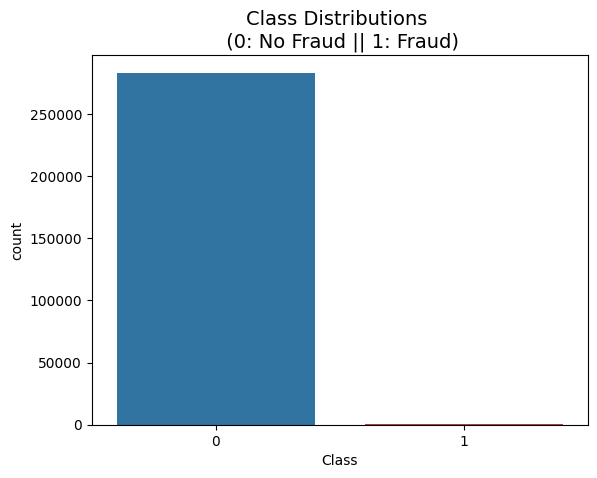

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [13]:
sns.countplot(data=df, x='Class', palette=[color_blue, color_red])
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

The data is highly imbalanced.

In [14]:
fraud = df[df['Class']==1]
not_fraud = df[df['Class']==0]

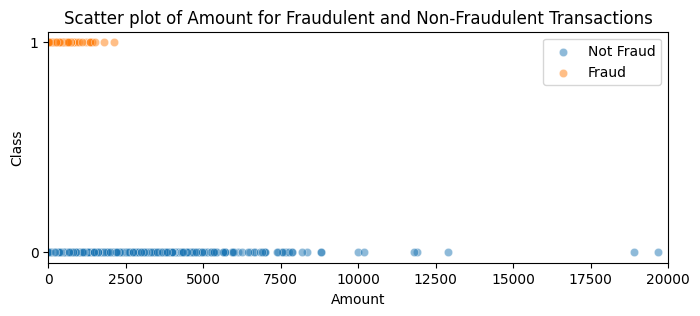

In [15]:
plt.figure(figsize=(8, 3))
plt.title('Scatter plot of Amount for Fraudulent and Non-Fraudulent Transactions')
sns.scatterplot(data=not_fraud, x='Amount', y='Class', label='Not Fraud', alpha=0.5)
sns.scatterplot(data=fraud, x='Amount', y='Class', label='Fraud', alpha=0.5)
plt.xlabel('Amount')
plt.ylabel('Class')
plt.legend()
plt.xlim((0, 20000))
plt.yticks([0, 1], ['0', '1'])

plt.show()

It appears that instances of fraud tend to occur when the transaction amount is less than 2500.

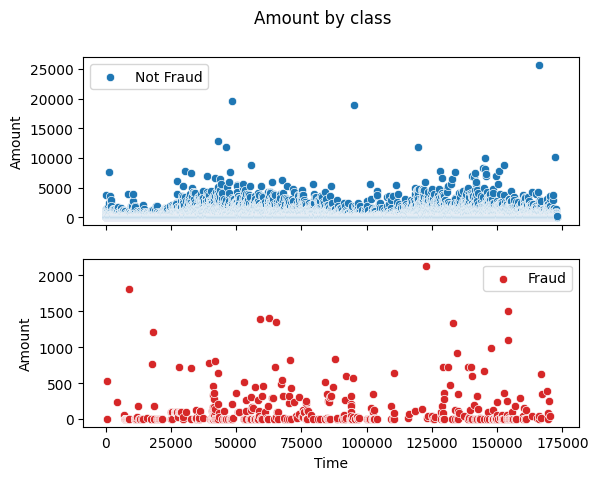

In [16]:
fig, axes = plt.subplots(2,1,sharex=True)
fig.suptitle('Amount by class')
sns.scatterplot(data=not_fraud, x='Time', y='Amount', label='Not Fraud', color=color_blue, ax=axes[0])
sns.scatterplot(data=fraud, x='Time', y='Amount', label='Fraud', color=color_red, ax=axes[1])
plt.show()

Fraudulent transactions with lower amounts happen at the same time as regular transactions, suggesting time alone may not show if a transaction is fraud.

<Axes: >

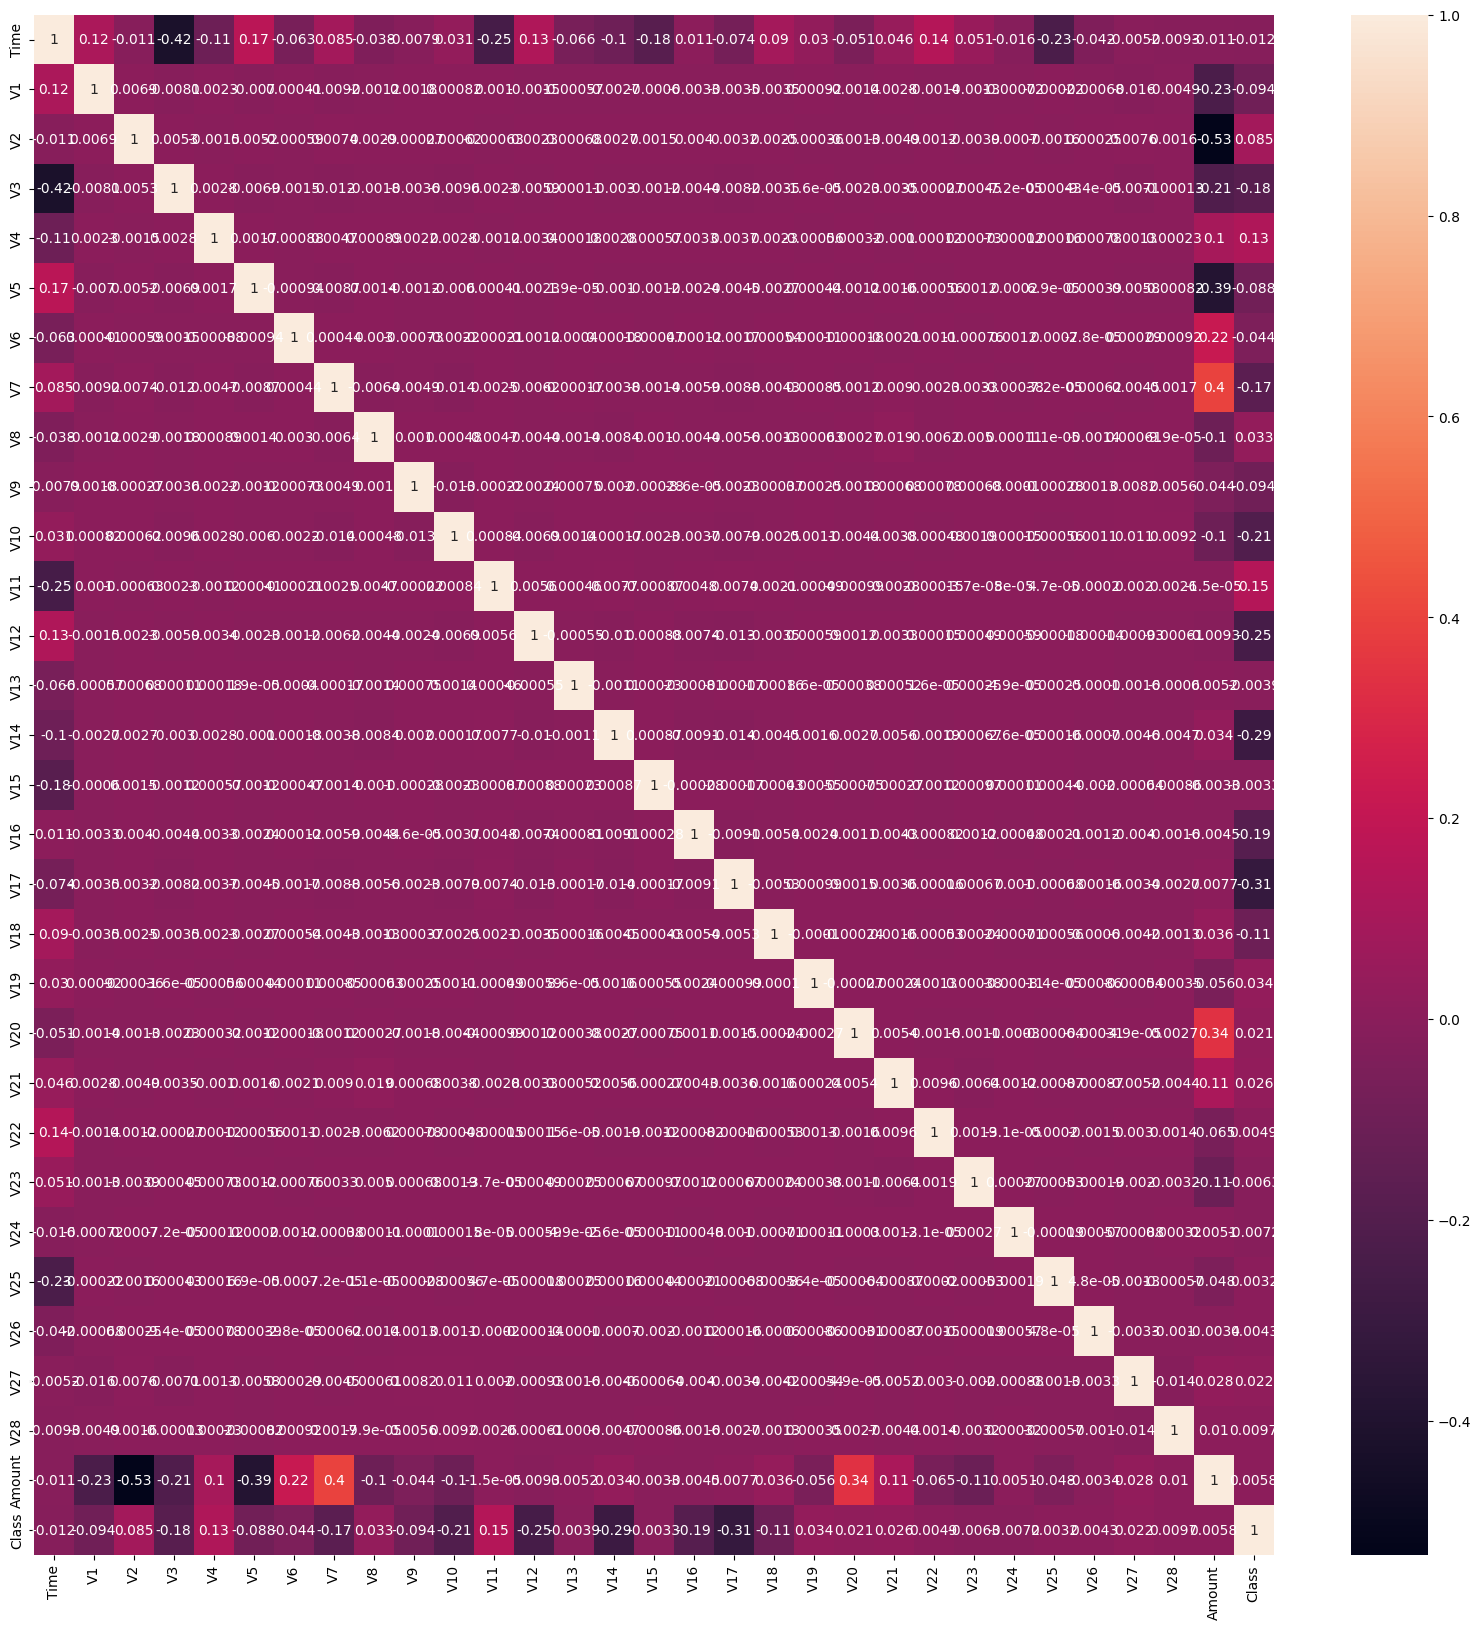

In [17]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(),annot=True)

The variables V17, V19, V2, and V10 have a moderate correlation with the Class variable.

# 4. Feature Engineering <a id="feature-engineering">

In [18]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, stratify=y, test_size = 0.4, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, stratify=y_val_test, test_size = 0.5, random_state = 42)

print('Train Class 0:', y_train.value_counts()[0])
print('Train Class 1:', y_train.value_counts()[1])
print('Val Class 0:', y_val.value_counts()[0])
print('Val Class 1:', y_val.value_counts()[1])
print('Test Class 0:', y_test.value_counts()[0])
print('Test Class 1:', y_test.value_counts()[1])

Train Class 0: 169951
Train Class 1: 284
Val Class 0: 56651
Val Class 1: 94
Test Class 0: 56651
Test Class 1: 95


### Feature Scaling <a id="feature-scaling">

In [19]:
### Standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Data resampling <a id="data-resampling">

In [20]:
# Handle imbalanced dataset using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# 4. Model Selection <a id="model-selection">

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
def plot_model_validation(history):
    plt.figure(figsize=(8, 6))
    
    # Loss Function Plot
    plt.subplot(2, 2, 1)
    plt.plot(history['loss'], label='Loss')
    plt.plot(history['val_loss'], label='val_Loss')
    plt.title('Loss Function evolution during training')
    plt.legend()
    
    # PR-AUC Plot
    plt.subplot(2, 2, 2)
    plt.plot(history['AUC'], label='ROC-AUC')
    plt.plot(history['val_AUC'], label='val_ROC-AUC')
    plt.title('ROC-AUC evolution during training')
    plt.legend()
    plt.ylim((0,1))
    
    # Precision Plot
    plt.subplot(2, 2, 3)
    plt.plot(history['precision'], label='precision')
    plt.plot(history['val_precision'], label='val_precision')
    plt.title('Precision evolution during training')
    plt.legend()
    plt.ylim((0,1))
    
    # Recall Plot
    plt.subplot(2, 2, 4)
    plt.plot(history['recall'], label='recall')
    plt.plot(history['val_recall'], label='val_recall')
    plt.title('Recall evolution during training')
    plt.legend()
    plt.ylim((0,1))
    
    plt.tight_layout()
    plt.show()

In [23]:
METRICS = [
    tf.keras.metrics.AUC(name='AUC', curve='ROC'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
BATCH_SIZE = 1024
EPOCHS = 100

In [24]:
X_train, y_train = shuffle(X_train, y_train)

In [25]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)
history = model.fit(X_train, y_train, validation_data=(X_val,y_val), 
                    epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True,
                   verbose=2)
model.save('models/model_16.h5')

Epoch 1/100
332/332 - 3s - loss: 0.4565 - AUC: 0.8995 - precision: 0.7599 - recall: 0.8700 - val_loss: 0.2464 - val_AUC: 0.9277 - val_precision: 0.0317 - val_recall: 0.8298 - 3s/epoch - 9ms/step
Epoch 2/100
332/332 - 2s - loss: 0.1519 - AUC: 0.9888 - precision: 0.9734 - recall: 0.9155 - val_loss: 0.1225 - val_AUC: 0.9569 - val_precision: 0.0611 - val_recall: 0.8723 - 2s/epoch - 5ms/step
Epoch 3/100
332/332 - 2s - loss: 0.1038 - AUC: 0.9948 - precision: 0.9775 - recall: 0.9500 - val_loss: 0.0893 - val_AUC: 0.9619 - val_precision: 0.0654 - val_recall: 0.8723 - 2s/epoch - 5ms/step
Epoch 4/100
332/332 - 1s - loss: 0.0832 - AUC: 0.9968 - precision: 0.9793 - recall: 0.9586 - val_loss: 0.0730 - val_AUC: 0.9586 - val_precision: 0.0698 - val_recall: 0.8617 - 1s/epoch - 4ms/step
Epoch 5/100
332/332 - 2s - loss: 0.0687 - AUC: 0.9978 - precision: 0.9818 - recall: 0.9665 - val_loss: 0.0639 - val_AUC: 0.9594 - val_precision: 0.0742 - val_recall: 0.8617 - 2s/epoch - 5ms/step
Epoch 6/100
332/332 - 2s 

Epoch 43/100
332/332 - 2s - loss: 0.0051 - AUC: 0.9998 - precision: 0.9980 - recall: 1.0000 - val_loss: 0.0169 - val_AUC: 0.8916 - val_precision: 0.3561 - val_recall: 0.7766 - 2s/epoch - 5ms/step
Epoch 44/100
332/332 - 2s - loss: 0.0049 - AUC: 0.9998 - precision: 0.9981 - recall: 1.0000 - val_loss: 0.0173 - val_AUC: 0.8916 - val_precision: 0.3397 - val_recall: 0.7553 - 2s/epoch - 5ms/step
Epoch 45/100
332/332 - 2s - loss: 0.0048 - AUC: 0.9998 - precision: 0.9982 - recall: 1.0000 - val_loss: 0.0164 - val_AUC: 0.8918 - val_precision: 0.3731 - val_recall: 0.7660 - 2s/epoch - 5ms/step
Epoch 46/100
332/332 - 2s - loss: 0.0047 - AUC: 0.9998 - precision: 0.9982 - recall: 1.0000 - val_loss: 0.0169 - val_AUC: 0.8918 - val_precision: 0.3586 - val_recall: 0.7553 - 2s/epoch - 5ms/step
Epoch 47/100
332/332 - 2s - loss: 0.0046 - AUC: 0.9998 - precision: 0.9983 - recall: 1.0000 - val_loss: 0.0167 - val_AUC: 0.8919 - val_precision: 0.3711 - val_recall: 0.7660 - 2s/epoch - 5ms/step
Epoch 48/100
332/332

Epoch 85/100
332/332 - 2s - loss: 0.0026 - AUC: 0.9999 - precision: 0.9990 - recall: 1.0000 - val_loss: 0.0177 - val_AUC: 0.8927 - val_precision: 0.4966 - val_recall: 0.7766 - 2s/epoch - 5ms/step
Epoch 86/100
332/332 - 2s - loss: 0.0026 - AUC: 0.9999 - precision: 0.9990 - recall: 1.0000 - val_loss: 0.0175 - val_AUC: 0.8926 - val_precision: 0.5106 - val_recall: 0.7660 - 2s/epoch - 5ms/step
Epoch 87/100
332/332 - 2s - loss: 0.0026 - AUC: 0.9999 - precision: 0.9990 - recall: 1.0000 - val_loss: 0.0181 - val_AUC: 0.8926 - val_precision: 0.4865 - val_recall: 0.7660 - 2s/epoch - 5ms/step
Epoch 88/100
332/332 - 2s - loss: 0.0025 - AUC: 0.9999 - precision: 0.9991 - recall: 1.0000 - val_loss: 0.0178 - val_AUC: 0.8927 - val_precision: 0.5177 - val_recall: 0.7766 - 2s/epoch - 5ms/step
Epoch 89/100
332/332 - 2s - loss: 0.0025 - AUC: 0.9999 - precision: 0.9991 - recall: 1.0000 - val_loss: 0.0180 - val_AUC: 0.8927 - val_precision: 0.5034 - val_recall: 0.7766 - 2s/epoch - 5ms/step
Epoch 90/100
332/332

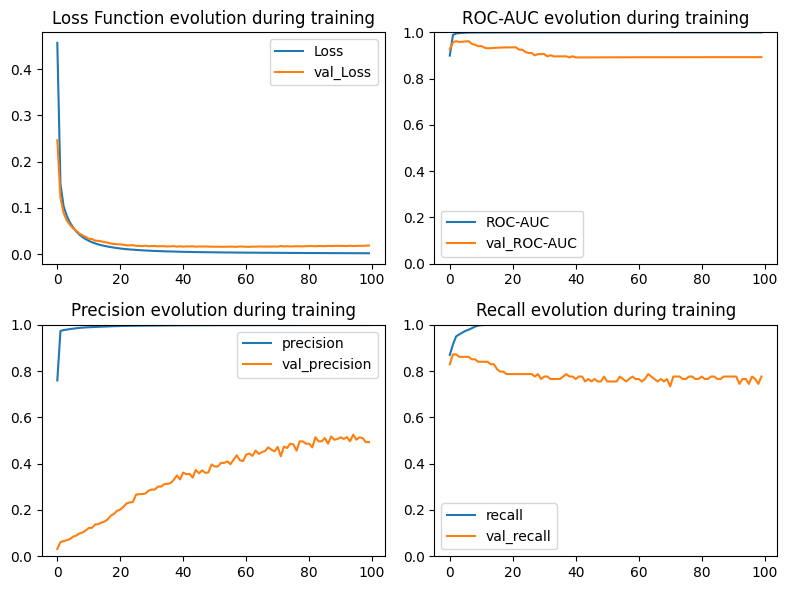

In [26]:
plot_model_validation(history.history)

In [27]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)
history = model.fit(X_train, y_train, validation_data=(X_val,y_val), 
                    epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True,
                   verbose=2)
model.save('models/model_32x16.h5')

Epoch 1/100
332/332 - 2s - loss: 0.1507 - AUC: 0.9908 - precision: 0.9633 - recall: 0.9203 - val_loss: 0.0508 - val_AUC: 0.9575 - val_precision: 0.0857 - val_recall: 0.8404 - 2s/epoch - 7ms/step
Epoch 2/100
332/332 - 2s - loss: 0.0358 - AUC: 0.9993 - precision: 0.9886 - recall: 0.9898 - val_loss: 0.0287 - val_AUC: 0.9450 - val_precision: 0.1386 - val_recall: 0.8404 - 2s/epoch - 5ms/step
Epoch 3/100
332/332 - 2s - loss: 0.0158 - AUC: 0.9997 - precision: 0.9940 - recall: 1.0000 - val_loss: 0.0162 - val_AUC: 0.9307 - val_precision: 0.2372 - val_recall: 0.7872 - 2s/epoch - 5ms/step
Epoch 4/100
332/332 - 2s - loss: 0.0096 - AUC: 0.9998 - precision: 0.9962 - recall: 1.0000 - val_loss: 0.0144 - val_AUC: 0.9272 - val_precision: 0.2948 - val_recall: 0.7872 - 2s/epoch - 5ms/step
Epoch 5/100
332/332 - 2s - loss: 0.0069 - AUC: 0.9998 - precision: 0.9973 - recall: 1.0000 - val_loss: 0.0127 - val_AUC: 0.9175 - val_precision: 0.3627 - val_recall: 0.7872 - 2s/epoch - 5ms/step
Epoch 6/100
332/332 - 2s 

Epoch 43/100
332/332 - 2s - loss: 2.1834e-04 - AUC: 1.0000 - precision: 0.9999 - recall: 1.0000 - val_loss: 0.0266 - val_AUC: 0.8722 - val_precision: 0.7582 - val_recall: 0.7340 - 2s/epoch - 5ms/step
Epoch 44/100
332/332 - 2s - loss: 1.9608e-04 - AUC: 1.0000 - precision: 0.9999 - recall: 1.0000 - val_loss: 0.0272 - val_AUC: 0.8668 - val_precision: 0.7253 - val_recall: 0.7021 - 2s/epoch - 5ms/step
Epoch 45/100
332/332 - 2s - loss: 1.7333e-04 - AUC: 1.0000 - precision: 0.9999 - recall: 1.0000 - val_loss: 0.0278 - val_AUC: 0.8721 - val_precision: 0.7391 - val_recall: 0.7234 - 2s/epoch - 5ms/step
Epoch 46/100
332/332 - 2s - loss: 1.7242e-04 - AUC: 1.0000 - precision: 0.9999 - recall: 1.0000 - val_loss: 0.0283 - val_AUC: 0.8775 - val_precision: 0.7283 - val_recall: 0.7128 - 2s/epoch - 5ms/step
Epoch 47/100
332/332 - 2s - loss: 5.3514e-04 - AUC: 1.0000 - precision: 0.9998 - recall: 1.0000 - val_loss: 0.0289 - val_AUC: 0.8827 - val_precision: 0.6979 - val_recall: 0.7128 - 2s/epoch - 5ms/step


Epoch 84/100
332/332 - 2s - loss: 4.8659e-05 - AUC: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0369 - val_AUC: 0.8563 - val_precision: 0.8049 - val_recall: 0.7021 - 2s/epoch - 5ms/step
Epoch 85/100
332/332 - 2s - loss: 6.0253e-05 - AUC: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0369 - val_AUC: 0.8563 - val_precision: 0.8049 - val_recall: 0.7021 - 2s/epoch - 5ms/step
Epoch 86/100
332/332 - 2s - loss: 4.3193e-05 - AUC: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0370 - val_AUC: 0.8562 - val_precision: 0.8049 - val_recall: 0.7021 - 2s/epoch - 5ms/step
Epoch 87/100
332/332 - 2s - loss: 5.8019e-05 - AUC: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0380 - val_AUC: 0.8509 - val_precision: 0.8333 - val_recall: 0.6915 - 2s/epoch - 5ms/step
Epoch 88/100
332/332 - 2s - loss: 1.8953e-04 - AUC: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0374 - val_AUC: 0.8562 - val_precision: 0.8025 - val_recall: 0.6915 - 2s/epoch - 5ms/step


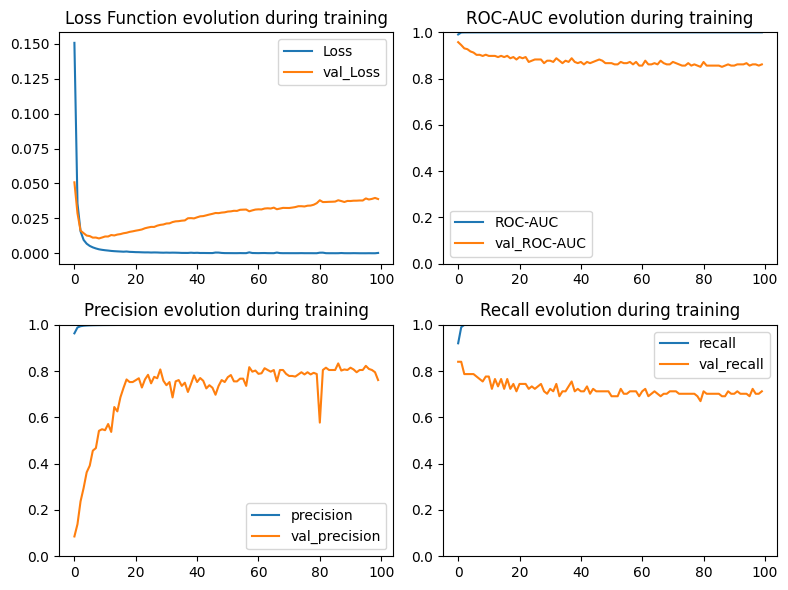

In [28]:
plot_model_validation(history.history)

In [29]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)
history = model.fit(X_train, y_train, validation_data=(X_val,y_val), 
                    epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True,
                   verbose=2)
model.save('models/model_32x16x8.h5')

Epoch 1/100
332/332 - 2s - loss: 0.2751 - AUC: 0.9666 - precision: 0.9275 - recall: 0.8998 - val_loss: 0.0666 - val_AUC: 0.9489 - val_precision: 0.0578 - val_recall: 0.8404 - 2s/epoch - 8ms/step
Epoch 2/100
332/332 - 2s - loss: 0.0416 - AUC: 0.9990 - precision: 0.9844 - recall: 0.9889 - val_loss: 0.0337 - val_AUC: 0.9246 - val_precision: 0.1099 - val_recall: 0.8404 - 2s/epoch - 5ms/step
Epoch 3/100
332/332 - 2s - loss: 0.0195 - AUC: 0.9996 - precision: 0.9917 - recall: 0.9994 - val_loss: 0.0221 - val_AUC: 0.9207 - val_precision: 0.1871 - val_recall: 0.8298 - 2s/epoch - 5ms/step
Epoch 4/100
332/332 - 2s - loss: 0.0122 - AUC: 0.9997 - precision: 0.9949 - recall: 0.9999 - val_loss: 0.0180 - val_AUC: 0.9224 - val_precision: 0.2420 - val_recall: 0.8085 - 2s/epoch - 5ms/step
Epoch 5/100
332/332 - 2s - loss: 0.0086 - AUC: 0.9997 - precision: 0.9966 - recall: 1.0000 - val_loss: 0.0160 - val_AUC: 0.9231 - val_precision: 0.2953 - val_recall: 0.7979 - 2s/epoch - 5ms/step
Epoch 6/100
332/332 - 2s 

Epoch 43/100
332/332 - 2s - loss: 3.0156e-04 - AUC: 1.0000 - precision: 0.9999 - recall: 1.0000 - val_loss: 0.0348 - val_AUC: 0.8508 - val_precision: 0.7021 - val_recall: 0.7021 - 2s/epoch - 5ms/step
Epoch 44/100
332/332 - 2s - loss: 2.2022e-04 - AUC: 1.0000 - precision: 0.9999 - recall: 1.0000 - val_loss: 0.0347 - val_AUC: 0.8508 - val_precision: 0.7253 - val_recall: 0.7021 - 2s/epoch - 5ms/step
Epoch 45/100
332/332 - 2s - loss: 2.8430e-04 - AUC: 1.0000 - precision: 0.9999 - recall: 1.0000 - val_loss: 0.0348 - val_AUC: 0.8508 - val_precision: 0.7253 - val_recall: 0.7021 - 2s/epoch - 5ms/step
Epoch 46/100
332/332 - 2s - loss: 3.4311e-04 - AUC: 1.0000 - precision: 0.9999 - recall: 1.0000 - val_loss: 0.0362 - val_AUC: 0.8613 - val_precision: 0.5565 - val_recall: 0.6809 - 2s/epoch - 5ms/step
Epoch 47/100
332/332 - 2s - loss: 7.8959e-04 - AUC: 1.0000 - precision: 0.9998 - recall: 0.9999 - val_loss: 0.0348 - val_AUC: 0.8456 - val_precision: 0.7412 - val_recall: 0.6702 - 2s/epoch - 5ms/step


Epoch 84/100
332/332 - 2s - loss: 6.6107e-05 - AUC: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0396 - val_AUC: 0.8509 - val_precision: 0.7386 - val_recall: 0.6915 - 2s/epoch - 5ms/step
Epoch 85/100
332/332 - 2s - loss: 8.4673e-05 - AUC: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0391 - val_AUC: 0.8668 - val_precision: 0.7083 - val_recall: 0.7234 - 2s/epoch - 5ms/step
Epoch 86/100
332/332 - 2s - loss: 1.3299e-04 - AUC: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0406 - val_AUC: 0.8509 - val_precision: 0.7471 - val_recall: 0.6915 - 2s/epoch - 5ms/step
Epoch 87/100
332/332 - 2s - loss: 1.5846e-04 - AUC: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0400 - val_AUC: 0.8561 - val_precision: 0.6346 - val_recall: 0.7021 - 2s/epoch - 5ms/step
Epoch 88/100
332/332 - 2s - loss: 4.6377e-04 - AUC: 1.0000 - precision: 0.9998 - recall: 1.0000 - val_loss: 0.0413 - val_AUC: 0.8508 - val_precision: 0.7303 - val_recall: 0.6915 - 2s/epoch - 5ms/step


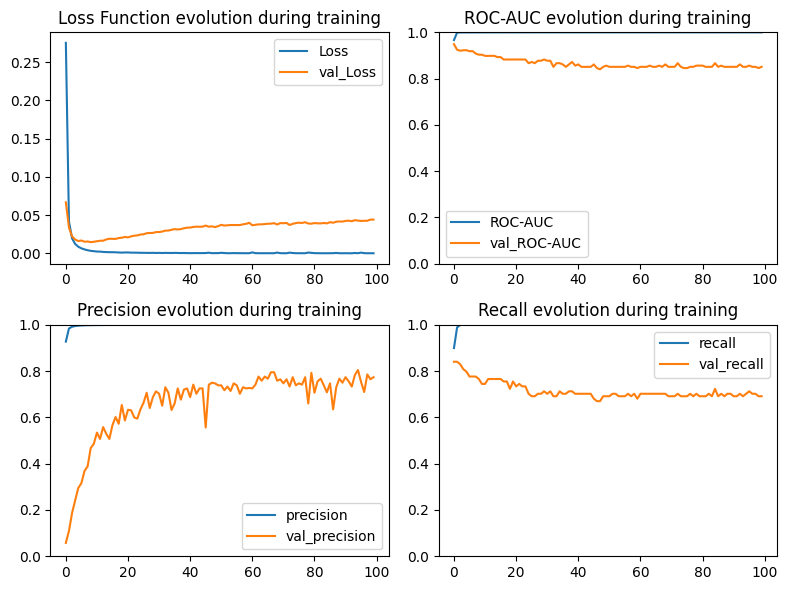

In [30]:
plot_model_validation(history.history)

In [31]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))  
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))  
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)
history = model.fit(X_train, y_train, validation_data=(X_val,y_val), 
                    epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True,
                   verbose=2)
model.save('models/model_32x16x8_dropout_03.h5')

Epoch 1/100
332/332 - 3s - loss: 0.2732 - AUC: 0.9673 - precision: 0.8583 - recall: 0.8974 - val_loss: 0.0617 - val_AUC: 0.9498 - val_precision: 0.0646 - val_recall: 0.8404 - 3s/epoch - 8ms/step
Epoch 2/100
332/332 - 2s - loss: 0.0921 - AUC: 0.9952 - precision: 0.9748 - recall: 0.9611 - val_loss: 0.0382 - val_AUC: 0.9273 - val_precision: 0.0943 - val_recall: 0.8298 - 2s/epoch - 5ms/step
Epoch 3/100
332/332 - 2s - loss: 0.0566 - AUC: 0.9982 - precision: 0.9828 - recall: 0.9856 - val_loss: 0.0246 - val_AUC: 0.9166 - val_precision: 0.1803 - val_recall: 0.7979 - 2s/epoch - 5ms/step
Epoch 4/100
332/332 - 2s - loss: 0.0397 - AUC: 0.9990 - precision: 0.9887 - recall: 0.9939 - val_loss: 0.0204 - val_AUC: 0.9181 - val_precision: 0.2863 - val_recall: 0.7979 - 2s/epoch - 6ms/step
Epoch 5/100
332/332 - 2s - loss: 0.0309 - AUC: 0.9993 - precision: 0.9914 - recall: 0.9958 - val_loss: 0.0190 - val_AUC: 0.9030 - val_precision: 0.3719 - val_recall: 0.7872 - 2s/epoch - 6ms/step
Epoch 6/100
332/332 - 2s 

Epoch 43/100
332/332 - 2s - loss: 0.0105 - AUC: 0.9996 - precision: 0.9990 - recall: 0.9973 - val_loss: 0.0368 - val_AUC: 0.8828 - val_precision: 0.7292 - val_recall: 0.7447 - 2s/epoch - 5ms/step
Epoch 44/100
332/332 - 2s - loss: 0.0109 - AUC: 0.9996 - precision: 0.9990 - recall: 0.9971 - val_loss: 0.0352 - val_AUC: 0.8827 - val_precision: 0.7245 - val_recall: 0.7553 - 2s/epoch - 5ms/step
Epoch 45/100
332/332 - 2s - loss: 0.0106 - AUC: 0.9996 - precision: 0.9991 - recall: 0.9971 - val_loss: 0.0349 - val_AUC: 0.8828 - val_precision: 0.7071 - val_recall: 0.7447 - 2s/epoch - 5ms/step
Epoch 46/100
332/332 - 2s - loss: 0.0103 - AUC: 0.9996 - precision: 0.9991 - recall: 0.9971 - val_loss: 0.0358 - val_AUC: 0.8827 - val_precision: 0.7188 - val_recall: 0.7340 - 2s/epoch - 5ms/step
Epoch 47/100
332/332 - 2s - loss: 0.0103 - AUC: 0.9996 - precision: 0.9990 - recall: 0.9973 - val_loss: 0.0348 - val_AUC: 0.8774 - val_precision: 0.7188 - val_recall: 0.7340 - 2s/epoch - 5ms/step
Epoch 48/100
332/332

Epoch 85/100
332/332 - 2s - loss: 0.0090 - AUC: 0.9997 - precision: 0.9992 - recall: 0.9973 - val_loss: 0.0193 - val_AUC: 0.8828 - val_precision: 0.8161 - val_recall: 0.7553 - 2s/epoch - 5ms/step
Epoch 86/100
332/332 - 2s - loss: 0.0087 - AUC: 0.9997 - precision: 0.9993 - recall: 0.9975 - val_loss: 0.0213 - val_AUC: 0.8882 - val_precision: 0.7778 - val_recall: 0.7447 - 2s/epoch - 5ms/step
Epoch 87/100
332/332 - 2s - loss: 0.0088 - AUC: 0.9997 - precision: 0.9993 - recall: 0.9974 - val_loss: 0.0229 - val_AUC: 0.8775 - val_precision: 0.7527 - val_recall: 0.7447 - 2s/epoch - 6ms/step
Epoch 88/100
332/332 - 2s - loss: 0.0095 - AUC: 0.9997 - precision: 0.9992 - recall: 0.9972 - val_loss: 0.0204 - val_AUC: 0.8828 - val_precision: 0.7609 - val_recall: 0.7447 - 2s/epoch - 5ms/step
Epoch 89/100
332/332 - 2s - loss: 0.0091 - AUC: 0.9997 - precision: 0.9992 - recall: 0.9972 - val_loss: 0.0216 - val_AUC: 0.8828 - val_precision: 0.8046 - val_recall: 0.7447 - 2s/epoch - 5ms/step
Epoch 90/100
332/332

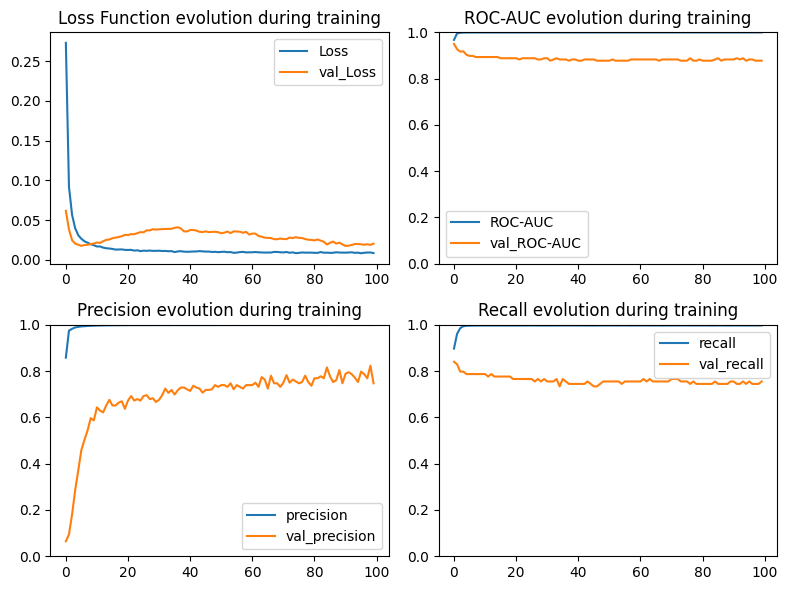

In [32]:
plot_model_validation(history.history)

We'll opt for the final model since its performance metrics show slight improvements compared to the others.

# 5. Model Evaluation <a id="model-evaluation">

In [33]:
# best_model = load_model('models/best_model.h5')
best_model = load_model('models/model_32x16x8_dropout_03.h5')
best_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                992       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_12 (Dense)            (None, 1)                

In [34]:
pred = best_model.predict(X_test)
round_pred = np.round(pred).astype(int)
report = classification_report(y_test,round_pred)
print(report)

1774/1774 [==============================] - 3s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.86      0.84      0.85        95

    accuracy                           1.00     56746
   macro avg       0.93      0.92      0.93     56746
weighted avg       1.00      1.00      1.00     56746



- The model performs extremely well in identifying non-fraudulent transactions (class 0), showing high precision and recall.
- However, for fraudulent transactions (class 1), the model misses a portion of actual fraudulent cases, which might need improvement for better fraud detection.

In [35]:
# best_model.save('models/best_model.h5')

# 6. Conclusion <a id="conclusion">


### Data Insights <a id="data-insights"></a>
The dataset is highly imbalanced, with most fraudulent instances linked to lower transaction amounts. There seems to be no evident correlation with time. Additionally, the specific meanings of variables V1-V28 are not clear, making it challenging to draw definitive conclusions or insights from these factors.

### Model Choice <a id="model-choice"></a>
The decision was made to select the model with 2 hidden layers and dropouts because of its marginally better performance compared to other models. It demonstrated outstanding accuracy in detecting non-fraudulent cases and good performance in identifying fraudulent transactions, with a precision of 0.86 and recall of 0.84.

### What's next <a id="whats-next"></a>
- Handle outliers to enhance model performance.
- Consider potentially removing unnecessary features from the dataset.
- Explore the possibility of slightly downsampling the majority class to reduce its impact on the model and potentially boost the representation of the minority class.